## Assign `Soil_ID` to every `Cell_ID` using majority area filled by SSURGO soil data

In [1]:
import sys
sys.path.append('..')

from pyagnps import soil_data_market as sdm

### Input files

In [2]:
source_cell_data_section = '../../inputs/topagnps/AnnAGNPS_Cell_Data_Section.csv'
output_cell_data_section = '../../outputs/soil_data_market/assigned_cell_data_section/AnnAGNPS_Cell_Data_Section.csv'

cells_shp = '../../outputs/shapefiles/AnnAGNPS_Cell_IDs.shp'
soil_data = '../../outputs/soil_data_market/shapefile/goodwin_creek_ssurgo.shp'

In [3]:
cells_gdf = sdm.assign_soil_to_annagnps_cells(source_cell_data_section, 
                                              cells_shp, 
                                              soil_data, 
                                              outpath_cell_data_section=output_cell_data_section, 
                                              write_csv=True)

In [8]:
cells_gdf

,Cell_ID,Soil_ID,Mgmt_Field_ID,Reach_ID,Reach_Location_Code,Cell_Area,Time_of_Conc,Avg_Elevation,RCN_Calib_ID,Avg_Land_Slope,...,Shallow_Conc_Flow_Length,Delivery_Ratio,Constant_USLE_C_Fctr,Constant_USLE_P_Fctr,All_OC_Calib_Fctr,All_N_Calib_Fctr,All_P_Calib_Fctr,Sheet_and_Rill_Erosion_Calib_Fctr,Gullies_Erosion_Calib_Fctr,Input_Units_Code
0,22,Fa,NaN,2,1,2.4093,NaN,71.37,NaN,0.11689,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,23,Gu,NaN,2,1,25.3161,NaN,78.95,NaN,0.11773,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,31,Gs,NaN,3,0,17.5698,NaN,82.33,NaN,0.08892,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,32,Fa,NaN,3,1,1.0053,NaN,73.08,NaN,0.09088,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,33,Fa,NaN,3,1,8.0532,NaN,78.22,NaN,0.06188,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,732,LoE2,NaN,73,1,8.0955,NaN,79.10,NaN,0.05894,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
179,733,LoE2,NaN,73,1,5.5044,NaN,84.51,NaN,0.11087,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
180,741,MnF2,NaN,74,0,15.0075,NaN,97.41,NaN,0.10225,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
181,742,MnF2,NaN,74,1,14.0517,NaN,85.58,NaN,0.10066,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### Bonus Visualization

In [25]:
import geopandas as gpd

cells_shp_gdf = gpd.read_file(cells_shp)
cells_shp_gdf = cells_shp_gdf.set_index('DN')

cells = cells_shp_gdf.join(cells_gdf.set_index('Cell_ID'))
cells = cells.rename_axis('Cell_ID').reset_index()
cells


,Cell_ID,geometry,Soil_ID,Mgmt_Field_ID,Reach_ID,Reach_Location_Code,Cell_Area,Time_of_Conc,Avg_Elevation,RCN_Calib_ID,...,Shallow_Conc_Flow_Length,Delivery_Ratio,Constant_USLE_C_Fctr,Constant_USLE_P_Fctr,All_OC_Calib_Fctr,All_N_Calib_Fctr,All_P_Calib_Fctr,Sheet_and_Rill_Erosion_Calib_Fctr,Gullies_Erosion_Calib_Fctr,Input_Units_Code
0,22,"POLYGON ((-89.91035 34.23753, -89.91022 34.237...",Fa,NaN,2,1,2.4093,NaN,71.37,NaN,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,23,"POLYGON ((-89.90915 34.23685, -89.90902 34.236...",Gu,NaN,2,1,25.3161,NaN,78.95,NaN,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,31,"POLYGON ((-89.91184 34.24295, -89.91180 34.242...",Gs,NaN,3,0,17.5698,NaN,82.33,NaN,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,32,"POLYGON ((-89.90954 34.23882, -89.90951 34.238...",Fa,NaN,3,1,1.0053,NaN,73.08,NaN,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,33,"POLYGON ((-89.91117 34.24346, -89.91110 34.243...",Fa,NaN,3,1,8.0532,NaN,78.22,NaN,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,733,"POLYGON ((-89.90393 34.24325, -89.90390 34.243...",LoE2,NaN,73,1,5.5044,NaN,84.51,NaN,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
188,733,"POLYGON ((-89.90282 34.24317, -89.90276 34.243...",LoE2,NaN,73,1,5.5044,NaN,84.51,NaN,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
189,741,"POLYGON ((-89.89758 34.23926, -89.89745 34.239...",MnF2,NaN,74,0,15.0075,NaN,97.41,NaN,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
190,742,"POLYGON ((-89.90395 34.23998, -89.90382 34.239...",MnF2,NaN,74,1,14.0517,NaN,85.58,NaN,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


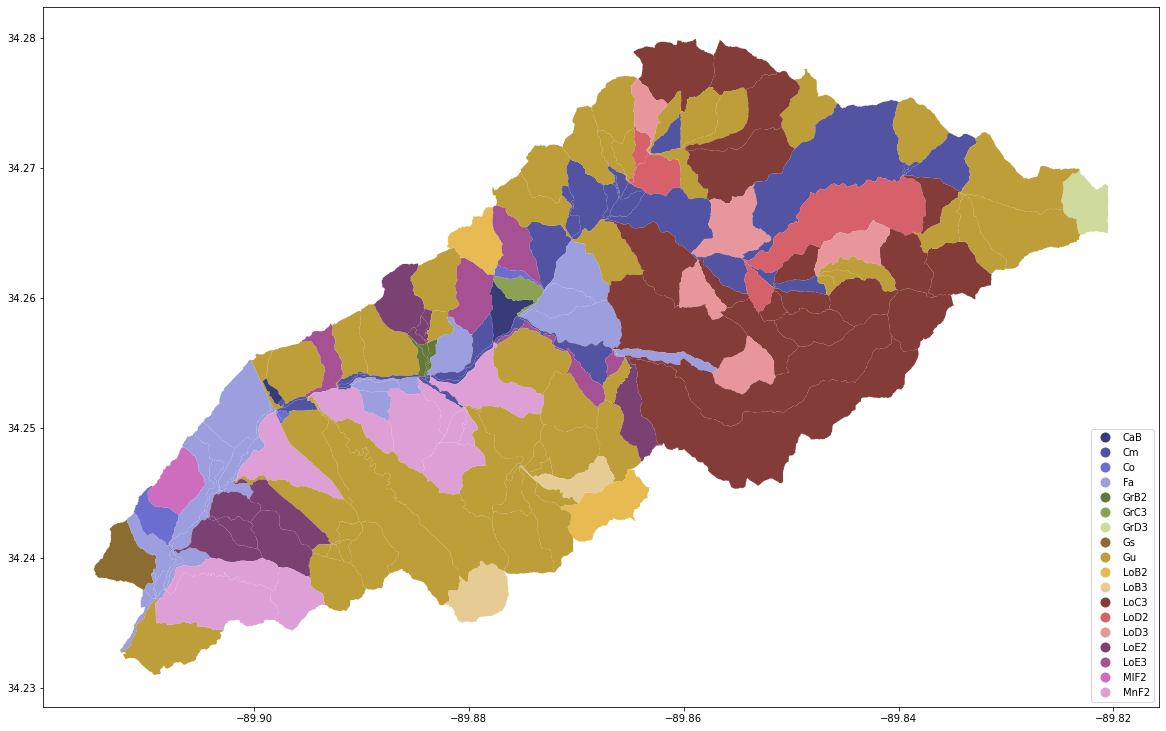

In [37]:
cells.plot(column='Soil_ID', categorical=True, cmap ='tab20b', legend=True, figsize=(20,15), legend_kwds={'loc':'lower right'});

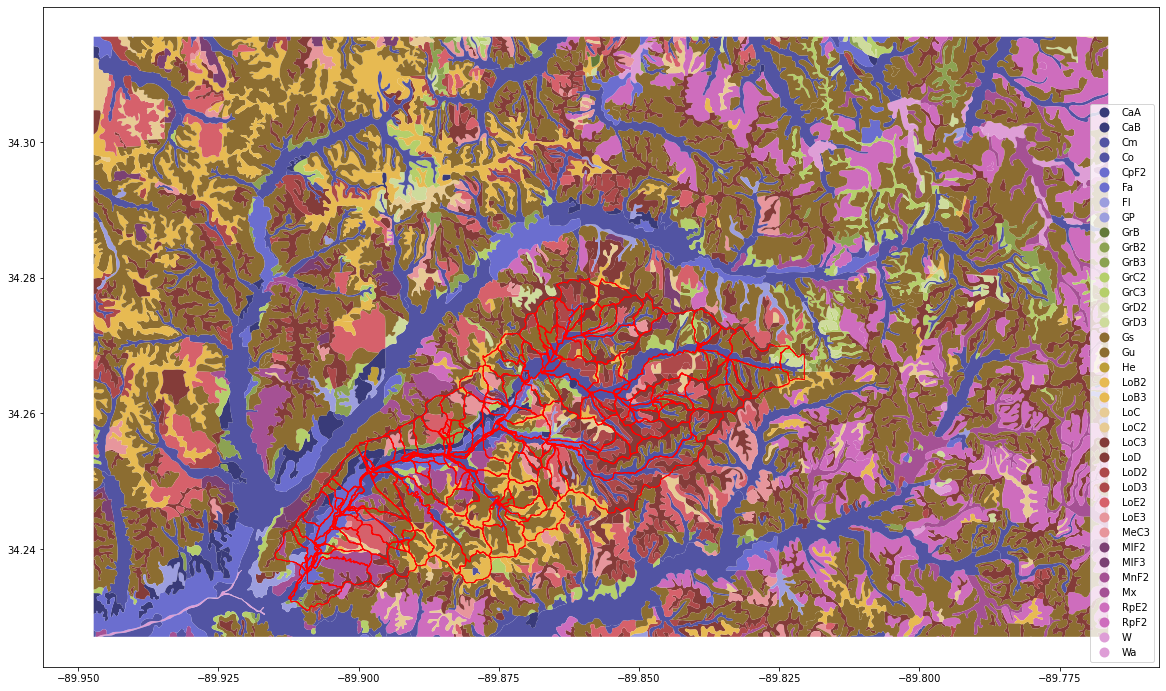

In [40]:
soil_data_gdf = gpd.read_file(soil_data)
ax = soil_data_gdf.plot(column='musym', categorical=True, cmap ='tab20b', legend=True, figsize=(20,15), legend_kwds={'loc':'lower right'});
cells_shp_gdf.plot(ax=ax, facecolor='none', edgecolor='r');